## Decision Tree and KNN
---
**Elo notes**

**Parametric Model:** 

e.g.

$y_i = \beta_1 x_{i1} + \cdots + \beta_p x_{ip} + \varepsilon_i = \mathbf{x}^{\rm T}_i\boldsymbol\beta + \varepsilon_i,
 \qquad i = 1, \ldots, n,$

**Non-Parametric Model:**

Nonparametric statistics are statistics not based on parameterized families of probability distributions. They include both descriptive and inferential statistics. The typical parameters are the mean, variance, etc. Unlike parametric statistics, nonparametric statistics make no assumptions about the probability distributions of the variables being assessed. The difference between parametric models and non-parametric models is that the former has a fixed number of parameters, while the latter grows the number of parameters with the amount of training data.

Note that the non-parametric model does, counterintuitively, contain parameters: the distinction is that parameters are determined by the training data in the case of non-parametric statistics, not the model.

$y_i =  f(x_i) + \varepsilon_i$ 

where $f(\cdot)$ can be any function. The data will decide what the function f looks like. Data will not tell you the analytic expression for $f(\cdot)$, but it will give you its graph given your data set.

Non-parametric methods are widely used for studying populations that take on a ranked order (such as movie reviews receiving one to four stars). The use of non-parametric methods may be necessary when data have a ranking but no clear numerical interpretation, such as when assessing preferences. In terms of levels of measurement, non-parametric methods result in "ordinal" data.

As non-parametric methods make fewer assumptions, their applicability is much wider than the corresponding parametric methods. In particular, they may be applied in situations where less is known about the application in question. Also, due to the reliance on fewer assumptions, non-parametric methods are more robust.

Another justification for the use of non-parametric methods is simplicity. In certain cases, even when the use of parametric methods is justified, non-parametric methods may be easier to use. Due both to this simplicity and to their greater robustness, non-parametric methods are seen by some statisticians as leaving less room for improper use and misunderstanding.

The wider applicability and increased robustness of non-parametric tests comes at a cost: in cases where a parametric test would be appropriate, non-parametric tests have less power. In other words, a larger sample size can be required to draw conclusions with the same degree of confidence.

** Non-parametric models**

Non-parametric models differ from parametric models in that the model structure is not specified a priori but is instead determined from data. The term non-parametric is not meant to imply that such models completely lack parameters but that the number and nature of the parameters are flexible and not fixed in advance.

* A histogram is a simple nonparametric estimate of a probability distribution.
* Kernel density estimation provides better estimates of the density than histograms.
* Nonparametric regression and semiparametric regression methods have been developed based on kernels, splines, and wavelets.
* Data envelopment analysis provides efficiency coefficients similar to those obtained by multivariate analysis without any distributional assumption.
* KNNs classify the unseen instance based on the K points in the training set which are nearest to it.
* A support vector machine (with a Gaussian kernel) is a nonparametric large-margin classifier.
* Non-parametrics models can be extended to artificial neural networks

**k-nearest neighbors algorithm**

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

* In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

* In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms. The algorithm k-NN is not to be confused with k-means, another popular machine learning technique.

**Statistical setting**

Suppose we have pairs 

$ {\displaystyle (X,Y),(X_{1},Y_{1}),\dots ,(X_{n},Y_{n})}$ 

taking values in ${\displaystyle \mathbb {R} ^{d}\times \{1,2\}} $

where $Y$ is the class label of $X$, so that $ {\displaystyle X|Y=r\sim P_{r}} $ for $ {\displaystyle r=1,2}$ (and probability distributions $ {\displaystyle P_{r}}$).

Given some norm ${\displaystyle \|\cdot \|}$on $ {\displaystyle \mathbb {R} ^{d}}$ and a point ${\displaystyle x\in \mathbb {R} ^{d}},$ let ${\displaystyle (X_{(1)},Y_{(1)}),\dots ,(X_{(n)},Y_{(n)})} $ be a reordering of the training data such that $  {\displaystyle \|X_{(1)}-x\|\leq \dots \leq \|X_{(n)}-x\|}$
        
To train the model, all you need to do is save the training data. There's absolutely no preprocessing that can be done.

A commonly used distance metric for continuous variables is Euclidean distance. For discrete variables, such as for text classification, another metric can be used, such as the overlap metric (or Hamming distance). In the context of gene expression microarray data, for example, k-NN has also been employed with correlation coefficients such as Pearson and Spearman. Often, the classification accuracy of k-NN can be improved significantly if the distance metric is learned with specialized algorithms such as Large Margin Nearest Neighbor or Neighbourhood components analysis.

In binary (two class) classification problems, it is helpful to choose k to be an odd number as this avoids tied votes. One popular way of choosing the empirically optimal k in this setting is via bootstrap method

In [1]:
from __future__ import division
from sklearn.datasets import make_classification
from collections import Counter
from itertools import izip
from matplotlib.colors import ListedColormap
from sklearn import neighbors

import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
X, y = make_classification(n_features=4, n_redundant=0, n_informative=1, n_clusters_per_class=1, class_sep=5, random_state=5)

In [11]:
X[:2]

array([[ 4.03391624,  0.95034471, -3.28391545, -0.77869325],
       [ 2.6279784 , -1.38033223,  1.35920097, -1.70208997]])

In [12]:
def eucld(a,b):
    return np.sqrt(sum((a-b)**2.))

In [73]:
cosine(X[0], X[1])

0.31258176927259906

In [74]:
cosine(X[0], X[1])

0.31258176927259906

In [59]:
X[0]

array([ 4.03391624,  0.95034471, -3.28391545, -0.77869325])

In [60]:
X[99]

array([-5.11289201, -0.23998173,  0.90688947,  0.02421074])

In [61]:
eucld(X[0], X[1])

5.4607607332824628

In [47]:
from elo_knn import Knn

In [99]:
X_, y_ = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, class_sep=5, random_state=5)

In [104]:
e_knn = Knn(3, eucld)

In [109]:
e_knn.fit(X_, y_)
y_predict = e_knn.predict(X_)
e_knn.score(X_, y_)

1.0

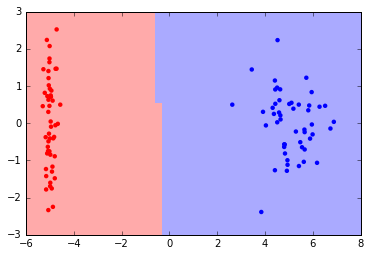

In [113]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.scatter(X_[:,0], X_[:,1], c=y, edgecolor='none', cmap=cmap_bold)
#plt.colorbar()

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
h=50 #
xx, yy = np.meshgrid(np.linspace(xmin, xmax, h),
                       np.linspace(ymin, ymax, h))

Z = e_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_[:,0], X_[:,1], c=y_, edgecolor='none', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show();


**Sklear**

(-3.0264018884985679, 3.5735981115014379)

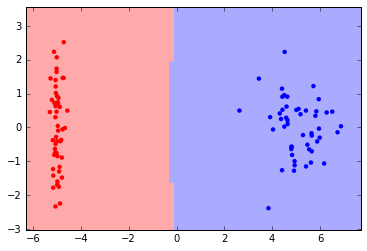

In [117]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

h = 0.2

clf = neighbors.KNeighborsClassifier(5)
clf.fit(X_, y_)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, lw=0, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

